In [14]:
import pandas as pd
import numpy as np
import os

def create_banking_dataset(filename='banking_data.csv', num_records=1000):
    """Create a banking dataset"""

    np.random.seed(42)

    data = {
        'Age': np.random.randint(22, 70, num_records),
        'Income': np.random.randint(20000, 500000, num_records),
        'Credit_Score': np.random.randint(300, 850, num_records),
        'Employment_Years': np.random.randint(0, 40, num_records),
        'Loan_Amount': np.random.randint(5000, 500000, num_records),
        'Debt_to_Income': np.random.uniform(0, 1, num_records),
        'Gender': np.random.choice(['Male', 'Female'], num_records),
        'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], num_records),
        'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], num_records),
        'Previous_Defaults': np.random.randint(0, 5, num_records),
    }

    df = pd.DataFrame(data)

    # Create target variable
    df['Loan_Decision'] = 0

    df.loc[
        (df['Credit_Score'] > 650) &
        (df['Debt_to_Income'] < 0.4) &
        (df['Previous_Defaults'] == 0),
        'Loan_Decision'
    ] = 1

    # Add randomness
    random_indices = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
    df.loc[random_indices, 'Loan_Decision'] = 1 - df.loc[random_indices, 'Loan_Decision']

    df.to_csv(filename, index=False)

    print(f"✓ Dataset created: {filename}")
    print(f"  📊 Number of records: {len(df)}")
    print(f"  📋 Number of fields: {len(df.columns)}\n")

    print("📈 Data Statistics:")
    print(f"  • Percentage of approved loans: {(df['Loan_Decision'].sum() / len(df)) * 100:.2f}%")
    print(f"  • Percentage of rejected loans: {((1 - df['Loan_Decision']).sum() / len(df)) * 100:.2f}%\n")

    print("First 5 records:")
    print(df.head())
    print()
    return df

# Execute
create_banking_dataset()

✓ Dataset created: banking_data.csv
  📊 Number of records: 1000
  📋 Number of fields: 11

📈 Data Statistics:
  • Percentage of approved loans: 13.40%
  • Percentage of rejected loans: 86.60%

First 5 records:
   Age  Income  Credit_Score  Employment_Years  Loan_Amount  Debt_to_Income  \
0   60  200448           608                 6        51220        0.459584   
1   50  196659           819                13       313307        0.306463   
2   36  450192           326                 8       401981        0.822381   
3   64  255659           498                18       384270        0.056979   
4   29  409678           686                13       348630        0.418607   

   Gender Marital_Status    Education  Previous_Defaults  Loan_Decision  
0  Female        Married  High School                  1              0  
1    Male        Married          PhD                  3              0  
2  Female       Divorced     Bachelor                  3              0  
3    Male       Divo

,Age,Income,Credit_Score,Employment_Years,Loan_Amount,Debt_to_Income,Gender,Marital_Status,Education,Previous_Defaults,Loan_Decision
0,60,200448,608,6,51220,0.459584,Female,Married,High School,1,0
1,50,196659,819,13,313307,0.306463,Male,Married,PhD,3,0
2,36,450192,326,8,401981,0.822381,Female,Divorced,Bachelor,3,0
3,64,255659,498,18,384270,0.056979,Male,Divorced,Master,4,0
4,29,409678,686,13,348630,0.418607,Male,Divorced,High School,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,27,105530,382,1,352247,0.458519,Female,Divorced,Master,0,0
996,47,250983,725,29,215747,0.564591,Male,Married,Master,3,0
997,25,303707,574,38,182597,0.663027,Female,Married,Bachelor,0,0
998,40,452557,583,3,174302,0.679067,Male,Single,High School,1,0


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

class BankingDecisionSystem:
    """Advanced banking decision system"""

    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_columns = []
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def load_data(self, filepath):
        """Load customer data"""
        try:
            data = pd.read_csv(filepath)
            print(f"✓ Data loaded successfully!")
            print(f"  📊 Number of rows: {len(data)}")
            print(f"  📋 Number of columns: {len(data.columns)}\n")
            return data
        except Exception as e:
            print(f"✗ Error loading data: {e}")
            return None

    def clean_data(self, data):
        """Clean the data"""
        try:
            # Remove empty rows
            data = data.dropna()
            print(f"✓ Data cleaned")
            print(f"  📊 Number of rows after cleaning: {len(data)}\n")
            return data
        except Exception as e:
            print(f"✗ Error cleaning data: {e}")
            return None

    def encode_categorical(self, data, categorical_columns):
        """Convert text data to numbers"""
        try:
            data_encoded = data.copy()

            for col in categorical_columns:
                if col not in self.label_encoders:
                    self.label_encoders[col] = LabelEncoder()
                    data_encoded[col] = self.label_encoders[col].fit_transform(data[col].astype(str))
                else:
                    data_encoded[col] = self.label_encoders[col].transform(data[col].astype(str))

            print(f"✓ Text data converted to numbers\n")
            return data_encoded
        except Exception as e:
            print(f"✗ Error converting data: {e}")
            return None

    def prepare_data(self, data, target_column, categorical_columns, test_size=0.2):
        """Prepare data for training"""
        try:
            # Convert text data
            data = self.encode_categorical(data, categorical_columns)

            # Separate inputs and outputs
            self.feature_columns = [col for col in data.columns if col != target_column]
            X = data[self.feature_columns]
            y = data[target_column]

            # Split data
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                X, y, test_size=test_size, random_state=42, stratify=y
            )

            # Normalize data
            self.X_train = self.scaler.fit_transform(self.X_train)
            self.X_test = self.scaler.transform(self.X_test)

            print(f"✓ Data prepared!")
            print(f"  📈 Training data: {len(self.X_train)}")
            print(f"  📉 Testing data: {len(self.X_test)}\n")
            return True
        except Exception as e:
            print(f"✗ Error preparing data: {e}")
            return False

    def train_model(self):
        """Train the model"""
        try:
            self.model.fit(self.X_train, self.y_train)
            print(f"✓ Model trained successfully!\n")
            return True
        except Exception as e:
            print(f"✗ Error training model: {e}")
            return False

    def evaluate_model(self):
        """Evaluate model performance"""
        try:
            y_pred = self.model.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, y_pred)

            print(f"📊 Evaluation Results:")
            print(f"  ✓ Model Accuracy: {accuracy*100:.2f}%\n")

            print(f"📋 Detailed Report:")
            print(classification_report(self.y_test, y_pred,
                                       target_names=['Rejected ❌', 'Approved ✅']))

            print(f"\n🔍 Confusion Matrix:")
            cm = confusion_matrix(self.y_test, y_pred)
            print(f"  Actual\\Predicted | Rejected | Approved")
            print(f"  ─────────────────┼──────────┼──────────")
            print(f"  Rejected         | {cm[0,0]:8d} | {cm[0,1]:8d}")
            print(f"  Approved         | {cm[1,0]:8d} | {cm[1,1]:8d}\n")

            return accuracy
        except Exception as e:
            print(f"✗ Error evaluating model: {e}")
            return None

    def make_decision(self, customer_data):
        """Make a decision on customer loan request"""
        try:
            # Convert data
            customer_encoded = customer_data.copy()

            for col in self.label_encoders:
                if col in customer_encoded.columns:
                    customer_encoded[col] = self.label_encoders[col].transform(
                        customer_encoded[col].astype(str)
                    )

            # Normalize data
            X = self.scaler.transform(customer_encoded[self.feature_columns])

            # Make prediction
            prediction = self.model.predict(X)[0]
            probability = self.model.predict_proba(X)[0]

            decision = "✅ Approved" if prediction == 1 else "❌ Rejected"
            confidence = max(probability) * 100

            return {
                'decision': decision,
                'confidence': confidence,
                'approved_prob': probability[1] * 100,
                'rejected_prob': probability[0] * 100
            }
        except Exception as e:
            print(f"✗ Error making decision: {e}")
            return None

    def get_feature_importance(self):
        """Get the most important factors affecting the decision"""
        importances = self.model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': self.feature_columns,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        return feature_importance_df

    def save_model(self, filename):
        """Save the model"""
        try:
            model_data = {
                'model': self.model,
                'scaler': self.scaler,
                'label_encoders': self.label_encoders,
                'feature_columns': self.feature_columns
            }
            pickle.dump(model_data, open(filename, 'wb'))
            print(f"✓ Model saved to: {filename}\n")
        except Exception as e:
            print(f"✗ Error saving model: {e}")

    def load_model(self, filename):
        """Load a saved model"""
        try:
            model_data = pickle.load(open(filename, 'rb'))
            self.model = model_data['model']
            self.scaler = model_data['scaler']
            self.label_encoders = model_data['label_encoders']
            self.feature_columns = model_data['feature_columns']
            print(f"✓ Model loaded from: {filename}\n")
        except Exception as e:
            print(f"✗ Error loading model: {e}")

print("✅ Banking system loaded successfully!")

✅ Banking system loaded successfully!


In [10]:
print("=" * 60)
print("🏦 Banking Decision System Using Machine Learning")
print("=" * 60 + "\n")

# Create system
banking_system = BankingDecisionSystem()

# Load data
data = banking_system.load_data('banking_data.csv')

if data is not None:
    # Clean data
    data = banking_system.clean_data(data)

    # Prepare data
    categorical_cols = ['Gender', 'Marital_Status', 'Education']
    banking_system.prepare_data(data, 'Loan_Decision', categorical_cols)

    # Train model
    banking_system.train_model()

    # Evaluate model
    banking_system.evaluate_model()

    # Show important factors
    print("🎯 Most Important Factors Affecting the Decision:")
    importance = banking_system.get_feature_importance()
    for idx, row in importance.head(5).iterrows():
        print(f"  {idx+1}. {row['Feature']}: {row['Importance']*100:.2f}%")
    print()

    # Save model
    banking_system.save_model('banking_model.pkl')

    print("✅ System created successfully!")

🏦 Banking Decision System Using Machine Learning

✓ Data loaded successfully!
  📊 Number of rows: 1000
  📋 Number of columns: 11

✓ Data cleaned
  📊 Number of rows after cleaning: 1000

✓ Text data converted to numbers

✓ Data prepared!
  📈 Training data: 800
  📉 Testing data: 200

✓ Model trained successfully!

📊 Evaluation Results:
  ✓ Model Accuracy: 90.00%

📋 Detailed Report:
              precision    recall  f1-score   support

  Rejected ❌       0.90      1.00      0.95       173
  Approved ✅       1.00      0.26      0.41        27

    accuracy                           0.90       200
   macro avg       0.95      0.63      0.68       200
weighted avg       0.91      0.90      0.87       200


🔍 Confusion Matrix:
  Actual\Predicted | Rejected | Approved
  ─────────────────┼──────────┼──────────
  Rejected         |      173 |        0
  Approved         |       20 |        7

🎯 Most Important Factors Affecting the Decision:
  6. Debt_to_Income: 19.20%
  3. Credit_Score: 16.18%


In [11]:
print("\n" + "=" * 60)
print("🔍 Testing the System on New Customers")
print("=" * 60 + "\n")

# Create customers for testing
test_customers = pd.DataFrame({
    'Age': [35, 28, 50, 45, 32],
    'Income': [100000, 45000, 300000, 75000, 55000],
    'Credit_Score': [750, 600, 800, 720, 680],
    'Employment_Years': [10, 3, 25, 12, 7],
    'Loan_Amount': [50000, 20000, 200000, 80000, 60000],
    'Debt_to_Income': [0.25, 0.55, 0.15, 0.30, 0.40],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female'],
    'Marital_Status': ['Married', 'Single', 'Married', 'Married', 'Divorced'],
    'Education': ['Bachelor', 'High School', 'Master', 'Bachelor', 'Master'],
    'Previous_Defaults': [0, 1, 0, 0, 1]
})

# Test each customer
for idx, customer in test_customers.iterrows():
    print(f"👤 Customer #{idx + 1}:")
    print(f"  • Age: {customer['Age']} years")
    print(f"  • Monthly Income: ${customer['Income']:,}")
    print(f"  • Credit Score: {customer['Credit_Score']}")
    print(f"  • Years of Employment: {customer['Employment_Years']}")
    print(f"  • Requested Loan Amount: ${customer['Loan_Amount']:,}")
    print(f"  • Debt to Income Ratio: {customer['Debt_to_Income']:.2f}")

    # Make decision
    result = banking_system.make_decision(customer.to_frame().T)

    print(f"\n  📋 Decision: {result['decision']}")
    print(f"  📊 Confidence Level: {result['confidence']:.2f}%")
    print(f"  ✅ Probability of Approval: {result['approved_prob']:.2f}%")
    print(f"  ❌ Probability of Rejection: {result['rejected_prob']:.2f}%")
    print("-" * 60 + "\n")


🔍 Testing the System on New Customers

👤 Customer #1:
  • Age: 35 years
  • Monthly Income: $100,000
  • Credit Score: 750
  • Years of Employment: 10
  • Requested Loan Amount: $50,000
  • Debt to Income Ratio: 0.25

  📋 Decision: ✅ Approved
  📊 Confidence Level: 59.00%
  ✅ Probability of Approval: 59.00%
  ❌ Probability of Rejection: 41.00%
------------------------------------------------------------

👤 Customer #2:
  • Age: 28 years
  • Monthly Income: $45,000
  • Credit Score: 600
  • Years of Employment: 3
  • Requested Loan Amount: $20,000
  • Debt to Income Ratio: 0.55

  📋 Decision: ❌ Rejected
  📊 Confidence Level: 92.00%
  ✅ Probability of Approval: 8.00%
  ❌ Probability of Rejection: 92.00%
------------------------------------------------------------

👤 Customer #3:
  • Age: 50 years
  • Monthly Income: $300,000
  • Credit Score: 800
  • Years of Employment: 25
  • Requested Loan Amount: $200,000
  • Debt to Income Ratio: 0.15

  📋 Decision: ✅ Approved
  📊 Confidence Level: 

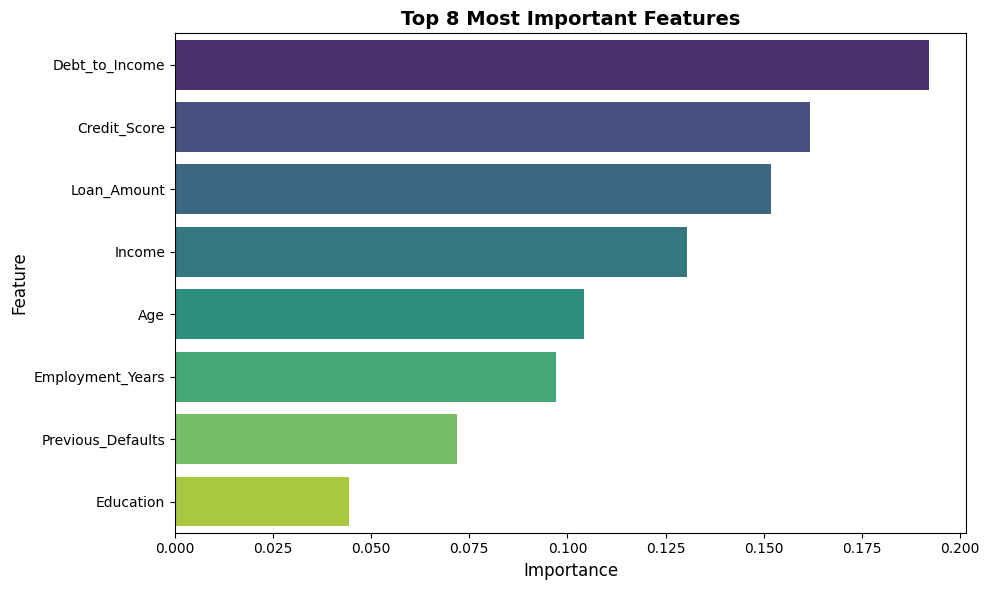

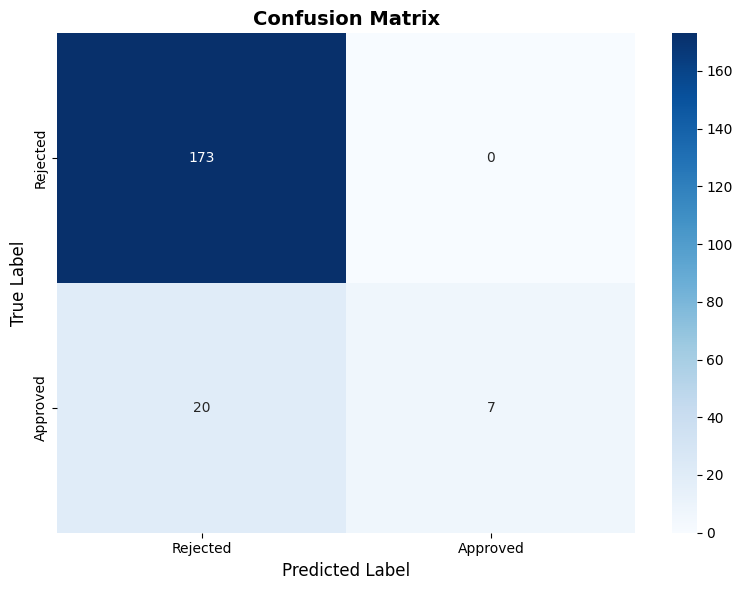

✅ Visualizations displayed successfully!


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update Arabic language support
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# 1️⃣ Top important factors
importance = banking_system.get_feature_importance()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=importance.head(8), x='Importance', y='Feature', palette='viridis')
plt.title('Top 8 Most Important Features', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# 2️⃣ Model accuracy
y_pred = banking_system.model.predict(banking_system.X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(banking_system.y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("✅ Visualizations displayed successfully!")


In [13]:
"""
Banking Decision-Making System Using Machine Learning
A complete project to make banking decisions based on ML
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

class BankingDecisionSystem:
    """Advanced banking decision system"""

    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.feature_columns = []
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def load_data(self, filepath):
        """Load customer data"""
        try:
            data = pd.read_csv(filepath)
            print(f"✓ Data loaded successfully!")
            print(f"  📊 Number of rows: {len(data)}")
            print(f"  📋 Number of columns: {len(data.columns)}\n")
            return data
        except Exception as e:
            print(f"✗ Error loading data: {e}")
            return None

    def clean_data(self, data):
        """Clean the data"""
        try:
            # Remove empty rows
            data = data.dropna()
            print(f"✓ Data cleaned")
            print(f"  📊 Number of rows after cleaning: {len(data)}\n")
            return data
        except Exception as e:
            print(f"✗ Error cleaning data: {e}")
            return None

    def encode_categorical(self, data, categorical_columns):
        """Convert text data to numbers"""
        try:
            data_encoded = data.copy()

            for col in categorical_columns:
                if col not in self.label_encoders:
                    self.label_encoders[col] = LabelEncoder()
                    data_encoded[col] = self.label_encoders[col].fit_transform(data[col].astype(str))
                else:
                    data_encoded[col] = self.label_encoders[col].transform(data[col].astype(str))

            print(f"✓ Text data converted to numbers\n")
            return data_encoded
        except Exception as e:
            print(f"✗ Error converting data: {e}")
            return None

    def prepare_data(self, data, target_column, categorical_columns, test_size=0.2):
        """Prepare data for training"""
        try:
            # Convert text data
            data = self.encode_categorical(data, categorical_columns)

            # Separate inputs and outputs
            self.feature_columns = [col for col in data.columns if col != target_column]
            X = data[self.feature_columns]
            y = data[target_column]

            # Split data
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                X, y, test_size=test_size, random_state=42, stratify=y
            )

            # Normalize data
            self.X_train = self.scaler.fit_transform(self.X_train)
            self.X_test = self.scaler.transform(self.X_test)

            print(f"✓ Data prepared!")
            print(f"  📈 Training data: {len(self.X_train)}")
            print(f"  📉 Testing data: {len(self.X_test)}\n")
            return True
        except Exception as e:
            print(f"✗ Error preparing data: {e}")
            return False

    def train_model(self):
        """Train the model"""
        try:
            self.model.fit(self.X_train, self.y_train)
            print(f"✓ Model trained successfully!\n")
            return True
        except Exception as e:
            print(f"✗ Error training model: {e}")
            return False

    def evaluate_model(self):
        """Evaluate model performance"""
        try:
            y_pred = self.model.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, y_pred)

            print(f"📊 Evaluation Results:")
            print(f"  ✓ Model Accuracy: {accuracy*100:.2f}%\n")

            print(f"📋 Detailed Report:")
            print(classification_report(self.y_test, y_pred,
                                       target_names=['Rejected ❌', 'Approved ✅']))

            print(f"\n🔍 Confusion Matrix:")
            cm = confusion_matrix(self.y_test, y_pred)
            print(f"  Actual\\Predicted | Rejected | Approved")
            print(f"  ─────────────────┼──────────┼──────────")
            print(f"  Rejected         | {cm[0,0]:8d} | {cm[0,1]:8d}")
            print(f"  Approved         | {cm[1,0]:8d} | {cm[1,1]:8d}\n")

            return accuracy
        except Exception as e:
            print(f"✗ Error evaluating model: {e}")
            return None

    def make_decision(self, customer_data):
        """Make a decision on customer loan request"""
        try:
            # Convert data
            customer_encoded = customer_data.copy()

            for col in self.label_encoders:
                if col in customer_encoded.columns:
                    customer_encoded[col] = self.label_encoders[col].transform(
                        customer_encoded[col].astype(str)
                    )

            # Normalize data
            X = self.scaler.transform(customer_encoded[self.feature_columns])

            # Make prediction
            prediction = self.model.predict(X)[0]
            probability = self.model.predict_proba(X)[0]

            decision = "✅ Approved" if prediction == 1 else "❌ Rejected"
            confidence = max(probability) * 100

            return {
                'decision': decision,
                'confidence': confidence,
                'approved_prob': probability[1] * 100,
                'rejected_prob': probability[0] * 100
            }
        except Exception as e:
            print(f"✗ Error making decision: {e}")
            return None

    def get_feature_importance(self):
        """Get the most important factors affecting the decision"""
        importances = self.model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': self.feature_columns,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        return feature_importance_df

    def save_model(self, filename):
        """Save the model"""
        try:
            model_data = {
                'model': self.model,
                'scaler': self.scaler,
                'label_encoders': self.label_encoders,
                'feature_columns': self.feature_columns
            }
            pickle.dump(model_data, open(filename, 'wb'))
            print(f"✓ Model saved to: {filename}\n")
        except Exception as e:
            print(f"✗ Error saving model: {e}")

    def load_model(self, filename):
        """Load a saved model"""
        try:
            model_data = pickle.load(open(filename, 'rb'))
            self.model = model_data['model']
            self.scaler = model_data['scaler']
            self.label_encoders = model_data['label_encoders']
            self.feature_columns = model_data['feature_columns']
            print(f"✓ Model loaded from: {filename}\n")
        except Exception as e:
            print(f"✗ Error loading model: {e}")


# Example usage
if __name__ == "__main__":
    print("=" * 60)
    print("🏦 Banking Decision System Using Machine Learning")
    print("=" * 60 + "\n")

    # Create system
    banking_system = BankingDecisionSystem()

    # Load data
    data = banking_system.load_data('banking_data.csv')

    if data is not None:
        # Clean data
        data = banking_system.clean_data(data)

        # Prepare data
        categorical_cols = ['Gender', 'Marital_Status', 'Education']
        banking_system.prepare_data(data, 'Loan_Decision', categorical_cols)

        # Train model
        banking_system.train_model()

        # Evaluate model
        banking_system.evaluate_model()

        # Show important factors
        print("🎯 Most Important Factors Affecting the Decision:")
        importance = banking_system.get_feature_importance()
        for idx, row in importance.head(5).iterrows():
            print(f"  {idx+1}. {row['Feature']}: {row['Importance']*100:.2f}%")
        print()

        # Save model
        banking_system.save_model('banking_model.pkl')

        print("✅ System created successfully!")

🏦 Banking Decision System Using Machine Learning

✓ Data loaded successfully!
  📊 Number of rows: 1000
  📋 Number of columns: 11

✓ Data cleaned
  📊 Number of rows after cleaning: 1000

✓ Text data converted to numbers

✓ Data prepared!
  📈 Training data: 800
  📉 Testing data: 200

✓ Model trained successfully!

📊 Evaluation Results:
  ✓ Model Accuracy: 90.00%

📋 Detailed Report:
              precision    recall  f1-score   support

  Rejected ❌       0.90      1.00      0.95       173
  Approved ✅       1.00      0.26      0.41        27

    accuracy                           0.90       200
   macro avg       0.95      0.63      0.68       200
weighted avg       0.91      0.90      0.87       200


🔍 Confusion Matrix:
  Actual\Predicted | Rejected | Approved
  ─────────────────┼──────────┼──────────
  Rejected         |      173 |        0
  Approved         |       20 |        7

🎯 Most Important Factors Affecting the Decision:
  6. Debt_to_Income: 19.20%
  3. Credit_Score: 16.18%
